In [3]:
import beamtest_analysis_helper as helper
from pathlib import Path
import pandas as pd
import numpy as np
from natsort import natsorted
from collections import defaultdict
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import sqlite3
from tqdm import tqdm
hep.style.use('CMS')

In [4]:
offset_dfs = defaultdict(pd.DataFrame)

path = Path('/media/daq/X9/')
dirs = natsorted(list(path.glob('Run_DESYFeb2024_Run_18_offset*')))

for idir in tqdm(dirs):
    files = natsorted(list(idir.glob('loop*/TDC*.bin'))) 
    decoder = helper.DecodeBinary(
        firmware_key=0b0001,
        board_id=[0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f],
        file_list=files,
        save_nem = None,
        skip_filler = True,
    )
    df, _ = decoder.decode_files()
    df = df.drop(columns=['bcid', 'l1a_counter', 'ea'])
    offset_dfs[idir.name.split('Run_18_')[1]] = df
    
    del df

Number of hits does not match!
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0010110000000000010000000000000001010101
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000001011000000000001000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Warning! Found 40 bits word which is not matched with the pattern 0000000000000000000000000010110000000000
Number

Warning! Found 40 bits word which is not matched with the pattern 0110110101010111011110000101010101101101


Warning! Found 40 bits word which is not matched with the pattern 0101111111000011110000000000000110111011
Warning! Found 40 bits word which is not matched with the pattern 0011110001011100010111111100001111000000


Warning! Found 40 bits word which is not matched with the pattern 0011110001011110000000000000000000111100


Warning! Found 40 bits word which is not matched with the pattern 0011110001011100010101010110100101010111


Warning! Found 40 bits word which is not matched with the pattern 1001101010010000000000011100010010100100


Warning! Found 40 bits word which is not matched with the pattern 0101111111000011110000000000000000110100
Warning! Found 40 bits word which is not matched with the pattern 0101011101111110010101010110101101010111


Warning! Found 40 bits word which is not matched with the pattern 0011110001011110000000000000000000111100
Warning! Found 40 bits word which is not matched with the pattern 1000110011101001100000010111100010110011


Warning! Found 40 bits word which is not matched with the pattern 0101111101010101011010110101011101111110


Warning! Found 40 bits word which is not matched with the pattern 0000000000000000001111000101111000000000


Warning! Found 40 bits word which is not matched with the pattern 1001010011100111111010010000110010110001
Warning! Found 40 bits word which is not matched with the pattern 0110101101010111011111110101010101101011


Warning! Found 40 bits word which is not matched with the pattern 0011110000000000000000000011110001011110


100%|██████████| 30/30 [58:00<00:00, 116.01s/it]


## Apply TDC cuts

In [7]:
offset_dfs

defaultdict(pandas.core.frame.DataFrame,
            {'offset_6':             evt  board  row  col  toa  tot  cal
             0             0      0    1    0  808  140  233
             1             1      0    5    9  222  153  215
             2             1      1    5    9  221  108  177
             3             1      2    4   10  250   92  178
             4             1      3    5   10  247  109  160
             ...         ...    ...  ...  ...  ...  ...  ...
             5035594  339701      3   13    2  278   61  172
             5035595  339702      0   14   12  686   23  208
             5035596  339702      3    7    8  206   19  161
             5035597  339703      0   14   12  685   25  209
             5035598  339703      3   13   14  522   13  159
             
             [5035599 rows x 7 columns],
             'offset_7': Empty DataFrame
             Columns: [evt, board, row, col, toa, tot, cal]
             Index: [],
             'offset_8':           

In [17]:
offset_dfs_cut_by_TDC = defaultdict(pd.DataFrame)
good_offsets = []
for key, val in offset_dfs.items():
    print(key, val.size)
    if(val.size<1): continue
    good_offsets += [int(key.split('_')[1])]
    df = val
    tdc_cuts = {}
    for idx in [0, 1, 2, 3]:
        # print(df.loc[df['board'] == idx]['cal'].mode()[0])
        # board ID: [CAL LB, CAL UB, TOA LB, TOA UB, TOT LB, TOT UB]
        if idx == 0:
            tdc_cuts[idx] = [df.loc[df['board'] == idx]['cal'].mode()[0]-50, df.loc[df['board'] == idx]['cal'].mode()[0]+50,  100, 500, 0, 600]
        else:
            tdc_cuts[idx] = [df.loc[df['board'] == idx]['cal'].mode()[0]-50, df.loc[df['board'] == idx]['cal'].mode()[0]+50,  0, 1100, 0, 600]
    # break
    filtered_df = helper.tdc_event_selection(df, tdc_cuts_dict=tdc_cuts, select_by_hit=True)
    offset_dfs_cut_by_TDC[key] = filtered_df
    
    del filtered_df, df

offset_6 35249193
offset_7 0
offset_8 30642570
offset_9 299236
offset_10 0
offset_11 4349562
offset_12 5580260
offset_13 28084259
offset_14 12869843
offset_15 85519
offset_16 0
offset_17 3962098
offset_18 0
offset_19 0
offset_20 0
offset_21 12847667
offset_22 0
offset_23 23137576
offset_24 0
offset_25 12683573
offset_26 0
offset_27 13414205
offset_28 27768209
offset_29 5882618
offset_30 27705027
offset_31 19190360
offset_32 0
offset_33 0
offset_34 6918730
offset_35 25554613


In [18]:
good_offsets

[6, 8, 9, 11, 12, 13, 14, 15, 17, 21, 23, 25, 27, 28, 29, 30, 31, 34, 35]

## Calculate TOT Mean value

In [33]:
outfile = 'tot_Mean_by_offsets.sqlite'
# offset_dfs_cut_by_TDC offset_dfs
with sqlite3.connect(outfile) as sqlconn:
    for key, val in offset_dfs_cut_by_TDC.items():
        for idx in [0, 1, 2, 3]:
            sum_group = val[val['board'] == idx].groupby(["col", "row"]).agg({'tot':['mean']})
            sum_group.columns = sum_group.columns.droplevel()
            sum_group.reset_index(inplace=True)

            table_mean = sum_group.pivot_table(index='row', columns='col', values='mean')
            table_mean = table_mean.round(3)

            table_mean = table_mean.reindex(pd.Index(np.arange(0,16), name='')).reset_index()
            table_mean = table_mean.reindex(columns=np.arange(0,16))

            name = key+'_board_id'+str(idx)
            name = name.replace("_", "")
            table_mean.to_sql(name, sqlconn, index=False, if_exists='replace')

## Check dataframes are saved correctly

In [34]:
# con = sqlite3.connect(outfile)
# data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', con) 
# print(data)

## Draw plot

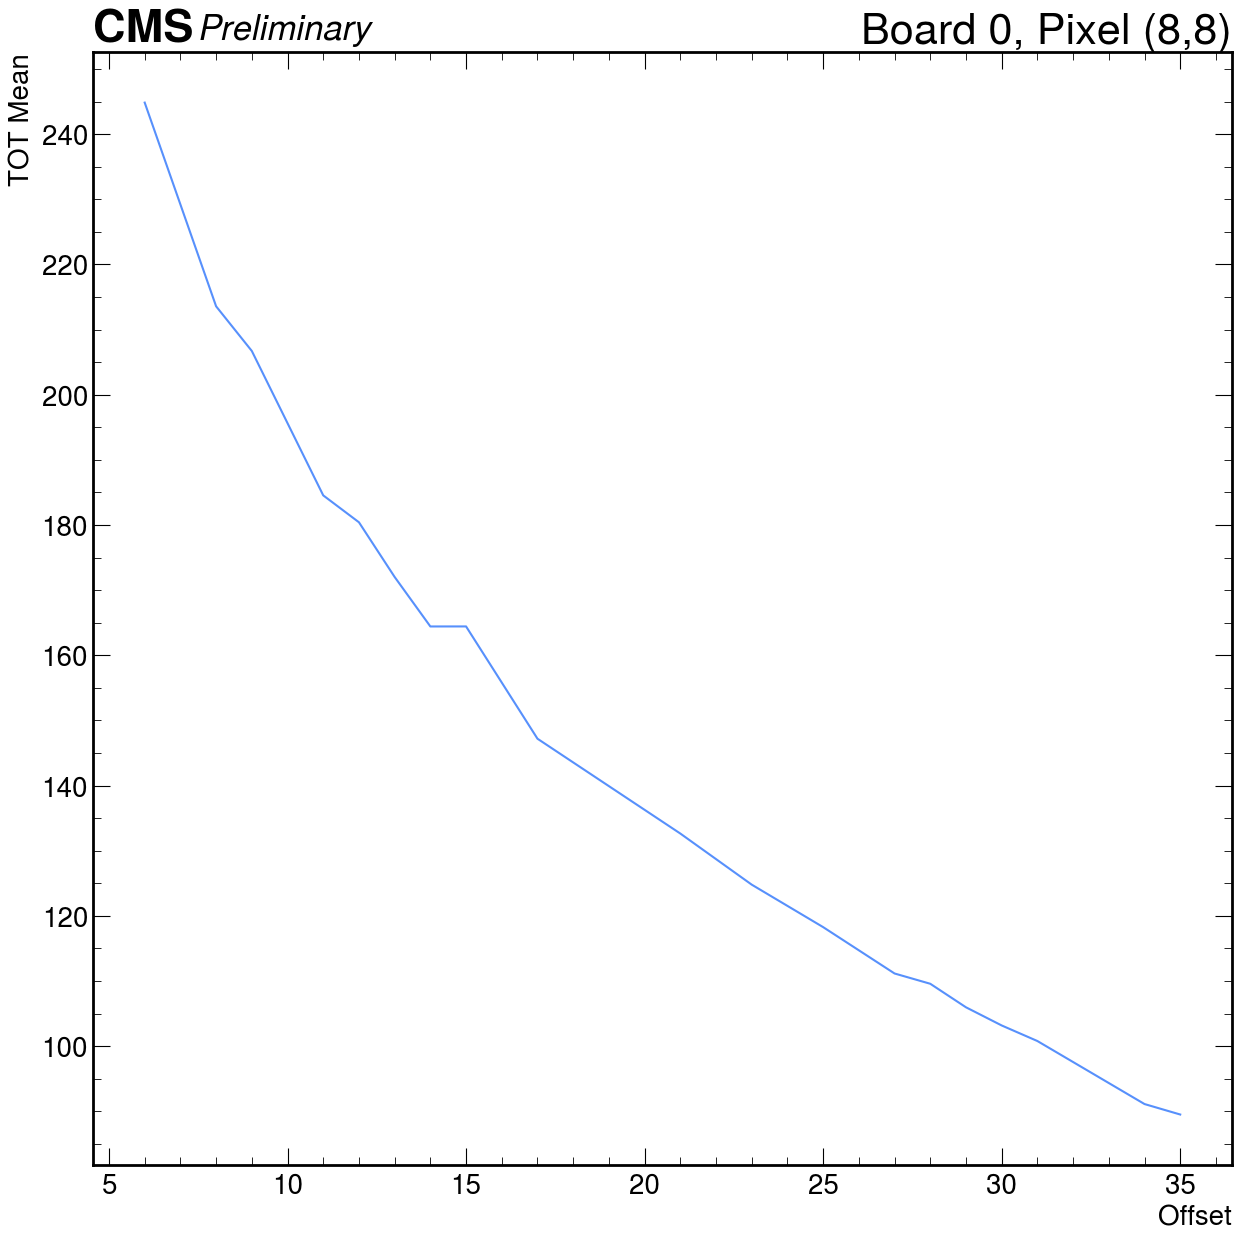

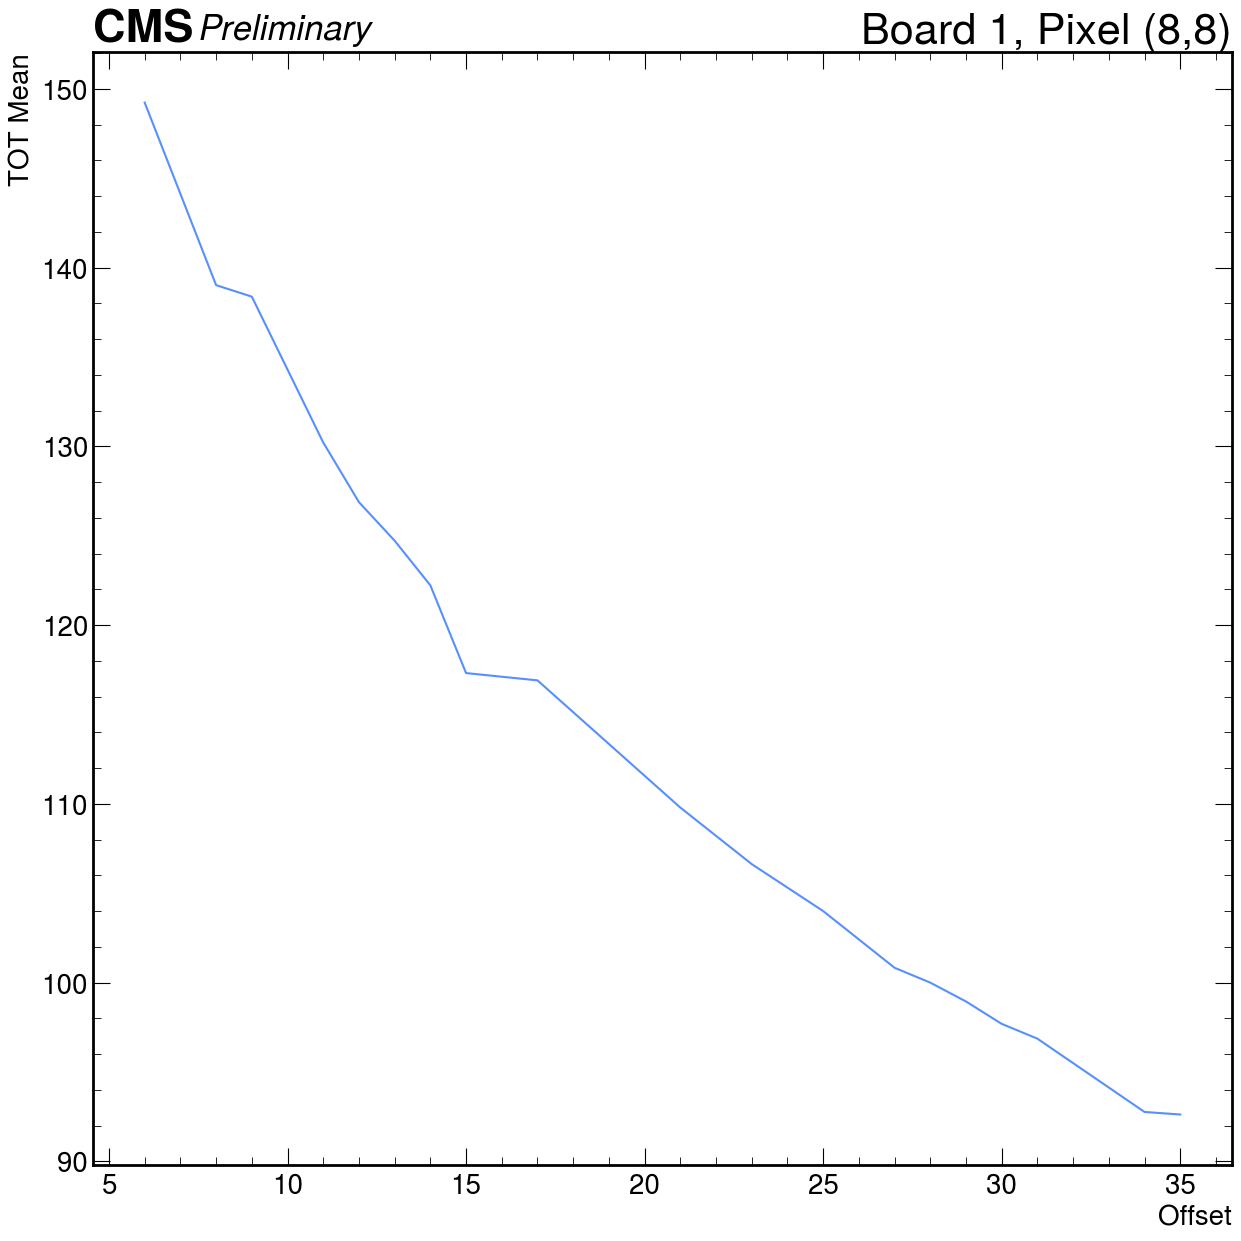

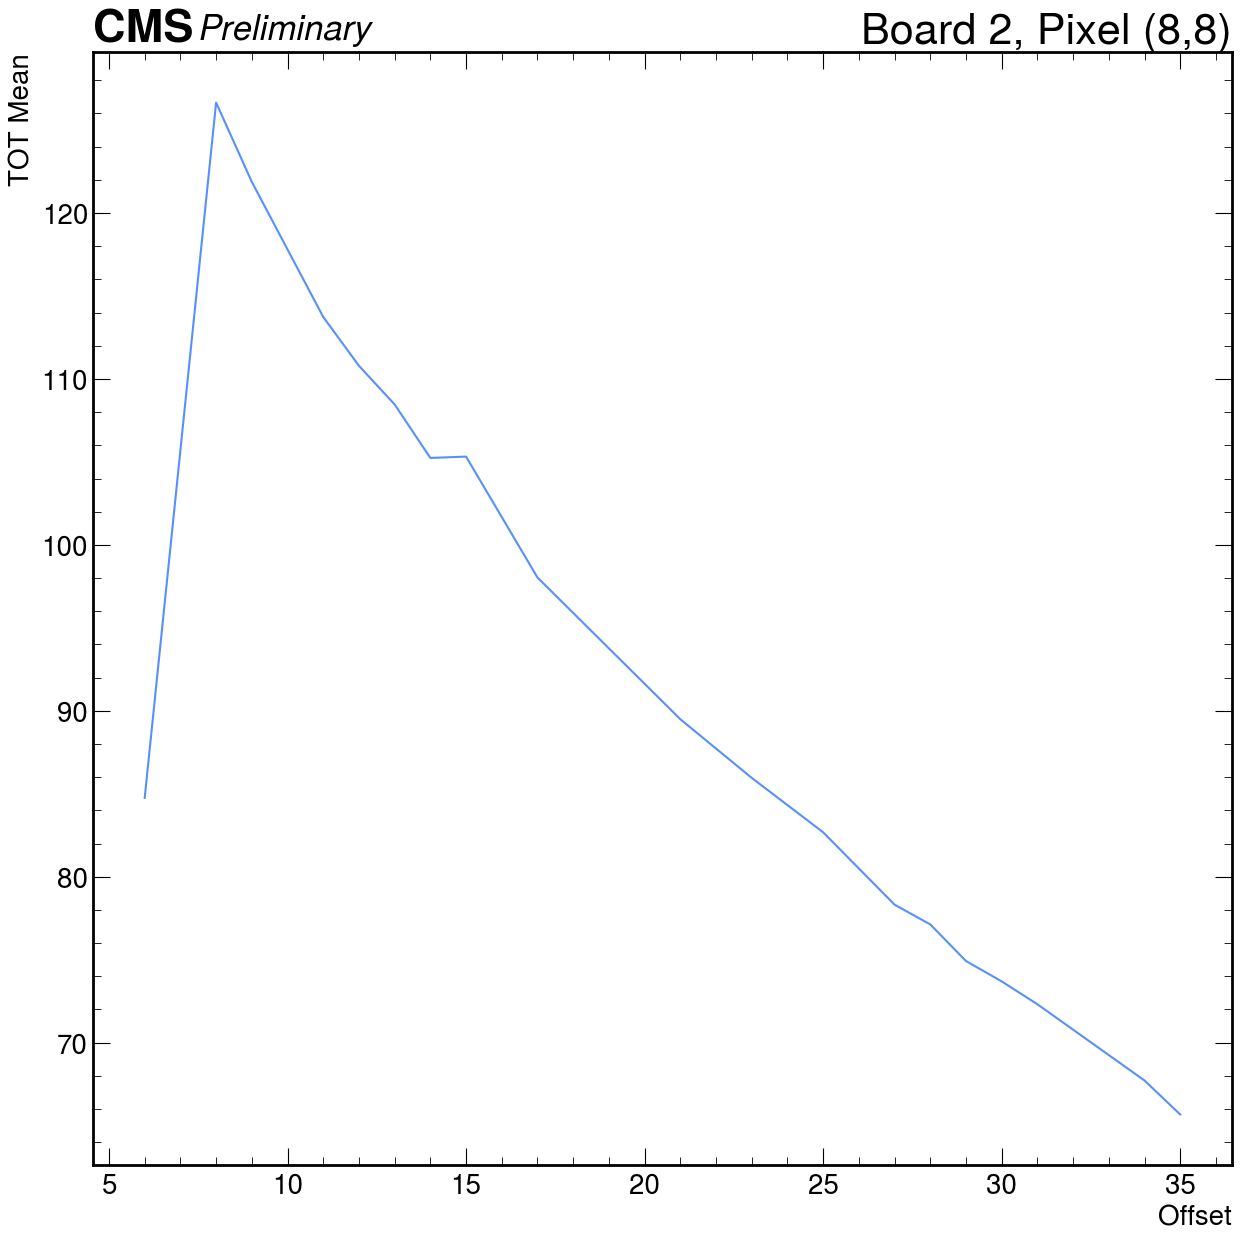

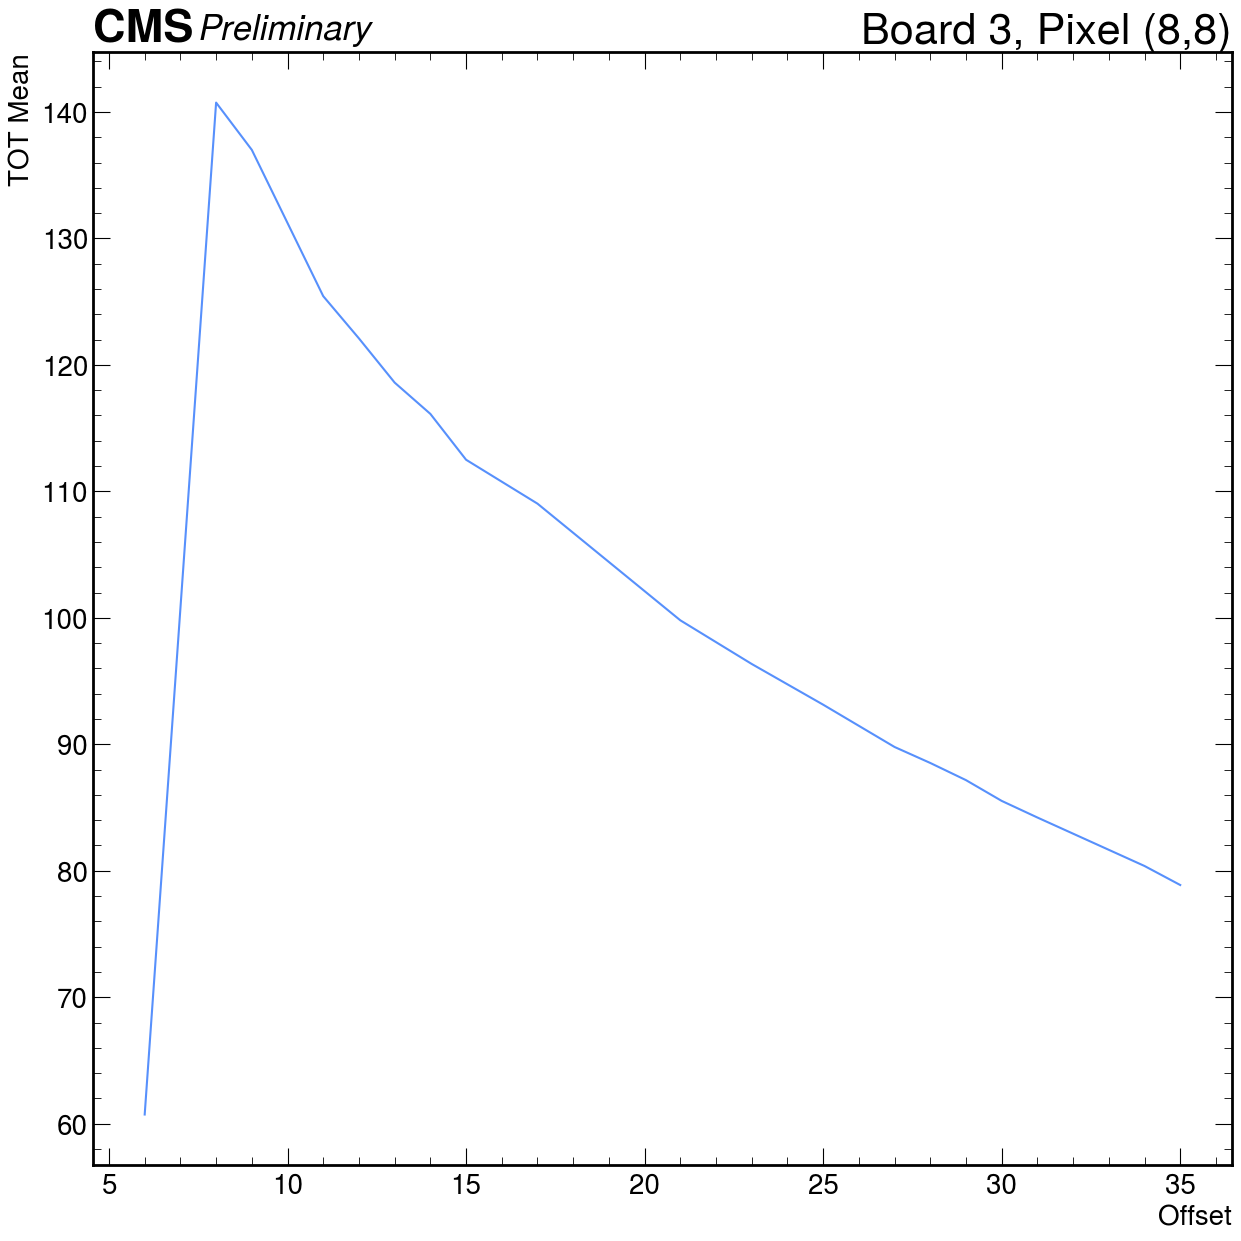

In [35]:
with sqlite3.connect(outfile) as conn:
    for idx in [0,1,2,3]:
        tot_means = []
        for ioffset in good_offsets:
            table_name = f'offset{ioffset}boardid{idx}'
            df = pd.read_sql_query(f'SELECT * FROM {table_name}', conn)
            tot_means.append(df.iloc[8,8]) # for now, just a single pixel
        fig, ax = plt.subplots(figsize=(13, 13))
        hep.cms.text(loc=0, ax=ax, text="Preliminary", fontsize=25)
        ax.set_xlabel('Offset', fontsize=20)
        ax.set_ylabel('TOT Mean', fontsize=20)
        ax.tick_params(axis='both', labelsize=20)
        ax.plot(good_offsets, tot_means)
        ax.set_title(f"Board {idx}, Pixel (8,8)", loc="right")
        plt.tight_layout()